## Customer Segmentation using RFM analysis

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

- Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
- Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
- Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

Here, Each of the three variables(Recency, Frequency, and Monetary) consists of four equal groups, which creates 64 (4x4x4) different customer segments.

Steps of RFM(Recency, Frequency, Monetary):

- Calculate the Recency, Frequency, Monetary values for each customer.
- Add segment bin values to RFM table using quartile.
- Sort the customer RFM score in ascending order.

In [100]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

import seaborn as sns # for plotting graphs
import datetime as dt

print('Libraries imported.')

Libraries imported.


## Customer Dataset
Let's first load the required HR dataset using the pandas read CSV function. You can download the data from this link.

In [101]:
#url="https://archive.ics.uci.edu/ml/machine-learning-databases/00352"
#df = pd.read_excel('File.xlsx', sheetname='Sheet1')
file = '/resources/data/Online_Retail.xlsx'
data=pd.read_excel(file)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [102]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [103]:
data1= data[pd.notnull(data['CustomerID'])]
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Now we check for duplicates

In [104]:
data2 = data1[['Country','CustomerID']]
data2.head(20)

,Country,CustomerID
0,United Kingdom,17850.0
1,United Kingdom,17850.0
2,United Kingdom,17850.0
3,United Kingdom,17850.0
4,United Kingdom,17850.0
5,United Kingdom,17850.0
6,United Kingdom,17850.0
7,United Kingdom,17850.0
8,United Kingdom,17850.0
9,United Kingdom,13047.0


In [105]:
#data1.duplicated()
data1[['Country','CustomerID']].duplicated()

0         False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9         False
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26        False
27         True
28         True
29         True
          ...  
541879     True
541880     True
541881     True
541882     True
541883     True
541884     True
541885     True
541886     True
541887     True
541888     True
541889     True
541890     True
541891     True
541892     True
541893     True
541894     True
541895     True
541896     True
541897     True
541898     True
541899     True
541900     True
541901     True
541902     True
541903     True
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 406829, dtype: b

## lets clean the data by dropping duplicates

In [106]:
filtered_data=data1[['Country','CustomerID']].drop_duplicates()
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


### Lets look at some visualization


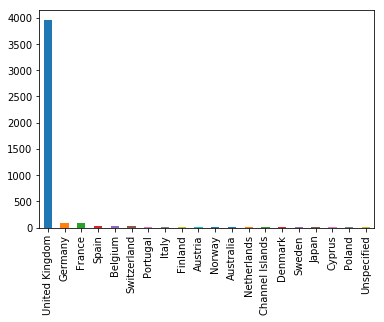

In [107]:
#Top ten country's customer
filtered_data.Country.value_counts()[:20].plot(kind='bar')

### In the given dataset, it can observe that most of the customers are from the "United Kingdom". 
### So, let's filter data for United Kingdom customer.

In [108]:
uk_data=data1[data1.Country=='United Kingdom']
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [109]:
uk_data.shape
print('The data has', uk_data.shape, 'rows and columns respectively.')

The data has (361878, 8) rows and columns respectively.


### Describe
The describe() function in pandas is convenient in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [110]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


From the description above, we can observe some of the customers have ordered in a negative quantity, which is not possible. So, you need to filter Quantity greater than zero

In [111]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [112]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [113]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


### Let's filter required Columns

Here, you can filter the necessary columns for RFM analysis. We only need five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice. CustomerId will uniquely define your customers, InvoiceDate help you calculate recency of purchase, InvoiceNo helps you to count the number of time transaction performed(frequency). Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help to calculate the total purchased amount.

In [114]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

### We calculate a toral price and add it to a new fiels 'TotalPrice'

In [115]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [116]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [117]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [118]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


## RFM Analysis
Let's perform following opertaions:

- For Recency, Calculate the number of days between present date and date of last purchase each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer.

In [119]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


### Change the name of columns

In [120]:
rfm.columns=['monetary','frequency','recency']
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [121]:
rfm['recency'] = rfm['recency'].astype(int)

In [122]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


### Computing Quantile of RFM values
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [123]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,4,1,4
12748.0,0,4596,33719,4,1,4
12749.0,3,199,4090,4,1,4
12820.0,3,59,942,3,2,4


### RFM Result Interpretation
Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers group well.

In [124]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,103,4196,4,1,4,414
12748.0,0,4596,33719,4,1,4,414
12749.0,3,199,4090,4,1,4,414
12820.0,3,59,942,3,2,4,324


### Let's sort the datafram by RFM_Score

In [125]:
rfm_sort=rfm.sort_values(by='RFM_Score', ascending=True)
rfm_sort.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
17254.0,4,112,272,1,1,4,114
17860.0,368,58,252,1,2,1,121
13568.0,173,44,192,1,2,1,121
17968.0,373,85,277,1,2,1,121
18212.0,326,43,248,1,2,1,121


### Let's filter out top/best customers

In [126]:
best_customers = rfm[rfm['RFM_Score']=='114'].sort_values('monetary', ascending=False)
best_customers.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
17254.0,4,112,272,1,1,4,114


In [127]:
print('The data has', best_customers.shape, 'rows and columns respectively.')

The data has (1, 7) rows and columns respectively.


##  Using k-means for Customer Segmentation

Let's import some important libraries and normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [128]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

X = rfm.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [129]:
num_clusters = 4

k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [130]:
print(k_means.cluster_centers_)  

[[3.58688889e+02 9.68862222e+03 4.00000000e+00 1.21666667e+00
  3.63333333e+00 4.15800000e+02]
 [2.57000000e+02 2.07559667e+05 4.00000000e+00 2.00000000e+00
  4.00000000e+00 4.24000000e+02]
 [1.21578261e+03 5.27256087e+04 4.00000000e+00 1.47826087e+00
  3.52173913e+00 4.18304348e+02]
 [7.02683715e+01 1.00327510e+03 2.41453567e+00 2.58734859e+00
  2.44764468e+00 2.69774697e+02]]


In [131]:
labels = k_means.labels_

print(k_means.labels_)  

[2 3 2 ... 3 3 3]


In [132]:
rfm["Labels"] = labels
rfm.head(5)

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,Labels
CustomerID,,,,,,,,
12346.0,325,1,77183,4,4,1,441,2
12747.0,2,103,4196,4,1,4,414,3
12748.0,0,4596,33719,4,1,4,414,2
12749.0,3,199,4090,4,1,4,414,3
12820.0,3,59,942,3,2,4,324,3


In [133]:
#rfm.groupby('Labels').mean().astype(int)

Text(0,0.5,'Regency')

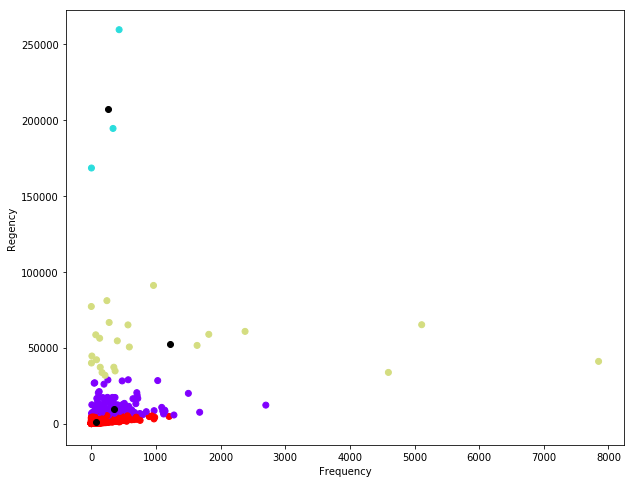

In [134]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=k_means.labels_, cmap='rainbow')  
plt.scatter(k_means.cluster_centers_[:,0] ,k_means.cluster_centers_[:,1], color='black') 
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Regency', fontsize=10)